In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns,statistics as stats
import scipy as sp

In [2]:
# Loading Dataset
file = ("Desktop/Data Analyst/Python/datasets/africa_food_prices.csv")
afp = pd.read_csv(file)
afp.head(7)

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN
5,15432,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,9,2015,80.0,NaN
6,15433,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,10,2015,80.0,NaN


In [3]:
afp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [4]:
# Checking the rows/columns of the dataset
afp.shape

(956779, 19)

In [5]:
afp.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [6]:
# Null values
afp.isnull().sum()

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                 126678
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64

In [7]:
# Brief for numeric / text columns
afp.describe()

,Unnamed: 0,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price,mp_commoditysource
count,9.567790e+05,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05,0.0
mean,1.076345e+06,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03,NaN
std,5.159597e+05,10404.034922,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05,NaN
min,1.542700e+04,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00,NaN
25%,5.939185e+05,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01,NaN
50%,1.113054e+06,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02,NaN
75%,1.513290e+06,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02,NaN
max,2.050637e+06,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07,NaN


In [8]:
# Rename a column
afp.rename({"Unnamed: 0":"id"},
          axis=1,inplace=True)

In [9]:
afp.head(5)

,id,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [10]:
# Delete a column
del afp['mp_commoditysource']

In [11]:
afp.shape

(956779, 18)

In [12]:
afp.columns

Index(['id', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price'],
      dtype='object')

In [13]:
# Rename a column
afp.rename({"um_unit_id":"unit_id"},
          axis=1, inplace=True)

In [14]:
afp.columns

Index(['id', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'unit_id', 'quantity', 'month', 'year', 'price'],
      dtype='object')

In [15]:
afp.isnull().sum()

id                  0
country_id          0
country             0
state_id            0
state          126678
market_id           0
market              0
produce_id          0
produce             0
currency_id         0
currency            0
pt_id               0
market_type         0
unit_id             0
quantity            0
month               0
year                0
price               0
dtype: int64

In [16]:
# Clean the NAN values or drop rows

# Drop rows with NAN values
afp.dropna(inplace=True)

In [17]:
afp.shape

(830101, 18)

In [18]:
afp.isnull().sum()

id             0
country_id     0
country        0
state_id       0
state          0
market_id      0
market         0
produce_id     0
produce        0
currency_id    0
currency       0
pt_id          0
market_type    0
unit_id        0
quantity       0
month          0
year           0
price          0
dtype: int64

In [19]:
# df.dtypes
afp.describe(include='object')

,country,state,market,produce,currency,market_type,quantity
count,830101,830101,830101,830101,830101,830101,830101
unique,36,311,1522,400,29,3,68
top,Rwanda,North/Amajyaruguru,Serrekunda,Millet - Retail,XOF,Retail,KG
freq,137746,34770,4130,43916,227321,760921,632971


In [20]:
afp.produce.unique()

array(['Rice - Retail', 'Bread - Retail', 'Beans (white) - Retail',
       'Milk - Retail', 'Potatoes - Retail', 'Eggs - Retail',
       'Meat (chicken) - Retail', 'Sugar - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail', 'Oil - Retail',
       'Meat (beef) - Retail', 'Cheese (dry) - Retail',
       'Carrots - Retail', 'Onions - Retail', 'Bananas - Retail',
       'Tea - Retail', 'Fuel (diesel) - Retail',
       'Fuel (petrol-gasoline) - Retail', 'Fish (canned) - Retail',
       'Apples - Retail', 'Oranges - Retail', 'Milk (camel) - Retail',
       'Meat (camel) - Retail', 'Tea (sahm) - Retail',
       'Oil (palm) - Retail', 'Cassava flour - Retail',
       'Maize flour - Retail', 'Rice (regular, milled) - Retail',
       'Milk (powder) - Retail', 'Oil (soybean) - Retail',
       'Sugar (white) - Retail', 'Salt (iodised) - Retail',
       'Rice (white, imported) - Retail', 'Maize meal (yellow) - Retail',
       'Fish (mackerel, dry) - Retail', 'Beans (kidney, 

In [21]:
afp.state.unique()

array(['Alger', 'Tindouf', 'Luanda', 'Lunda Norte', 'Alibori', 'Atakora',
       'Atlantique', 'Borgou', 'Collines', 'Couffo', 'Donga', 'Littoral',
       'Mono', 'Oueme', 'Plateau', 'Zou', 'Bubanza', 'Bujumbura Mairie',
       'Bujumbura Rural', 'Bururi', 'Cankuzo', 'Cibitoke', 'Gitega',
       'Karuzi', 'Kayanza', 'Kirundo', 'Makamba', 'Muramvya', 'Muyinga',
       'Mwaro', 'Ngozi', 'Rutana', 'Ruyigi', 'Adamaoua', 'Centre', 'Est',
       'Extreme - Nord', 'Nord', 'Nord - Ouest', 'Ouest', 'Sud - Ouest',
       'Santiago', 'Santo Antao', 'Sao Vicente', 'Bamingui-Bangoran',
       'Haut-Mbomou', 'Haute-Kotto', 'Kémo', 'Lobaye', 'Mambéré-Kadéï',
       'Mbomou', 'Nana-Gribizi', 'Nana-Mambéré', "Ombella M'Poko",
       'Ouaka', 'Ouham', 'Ouham Pendé', 'Sangha-Mbaéré', 'Vakaga',
       'Bangui', 'Bouenza', 'Cuvette', 'Lekoumou', 'Likouala', 'Pool',
       'Point-Noire', 'Brazzaville', 'Ali Sabieh', 'Dikhil', 'Djibouti',
       'Obock', 'Tadjourah', 'Maekel', 'Semenawi Keih Bahri',
       '

In [22]:
afp.country.unique()

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Congo', 'Djibouti', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Togo',
       'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [23]:
afp.market.unique()

array(['Algiers', 'Tindouf', 'Samara', ..., 'Rutendo 6', 'Matibi',
       'Mbilashaba'], dtype=object)

In [24]:
# Value count
afp.produce.value_counts()

produce
Millet - Retail                       43916
Sorghum - Retail                      43861
Maize - Retail                        42480
Rice (imported) - Retail              42124
Rice (local) - Retail                 29524
                                      ...  
Butter (cow milk) - Retail                2
Beans (haricot, white) - Wholesale        2
Beans (haricot, red) - Wholesale          1
Kocho - Retail                            1
Sorghum (biofortified) - Retail           1
Name: count, Length: 400, dtype: int64

In [25]:
# value_count
afp.market_type.value_counts()

market_type
Retail       760921
Wholesale     68932
Producer        248
Name: count, dtype: int64

In [26]:
afp

,id,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,unit_id,quantity,month,year,price
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0000
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0000
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0000
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0000
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333
956775,2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000
956776,2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000
956777,2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000


In [27]:
# Check the data types of columns in the Dataframe 
print("Data types in afp:/n", afp.dtypes)

Data types in afp:/n id               int64
country_id     float64
country         object
state_id         int64
state           object
market_id        int64
market          object
produce_id       int64
produce         object
currency_id    float64
currency        object
pt_id            int64
market_type     object
unit_id          int64
quantity        object
month            int64
year             int64
price          float64
dtype: object


In [28]:
afp.columns

Index(['id', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'unit_id', 'quantity', 'month', 'year', 'price'],
      dtype='object')

# Research Questions From The Dataset

### 1. The Average Food Prices For Each Country?

In [29]:
# Read the dataset into a DataFrame
data = pd.read_csv("Desktop/Data Analyst/Python/datasets/africa_food_prices.csv") 

# Calculate average food prices by country
average_prices_by_country = data.groupby('country')['price'].mean()

print("Average prices for each country:")
print(average_prices_by_country)

Average prices for each country:
country
Algeria                        164.961907
Angola                        1038.963442
Benin                          612.744978
Burundi                       2516.897501
Cameroon                     12194.504486
Cape Verde                      87.230546
Central African Republic       980.444644
Chad                          6402.038909
Congo                         1461.473620
Djibouti                       802.733808
Egypt                           19.291319
Eritrea                       2272.000000
Ethiopia                      1219.600790
Gabon                          691.063492
Gambia                          56.864125
Ghana                          106.865747
Guinea                       10879.303370
Guinea-Bissau                  877.138516
Kenya                         1191.952042
Lesotho                         33.346925
Liberia                       1273.684710
Libya                            5.647125
Madagascar                    2549.

### 2. Top Five Most Sold Products 

In [30]:
# Count Occurences Of Each Product And Pick The Top 5 Most Sold Product
TopFiveProducts = afp['produce'].value_counts().head(5)

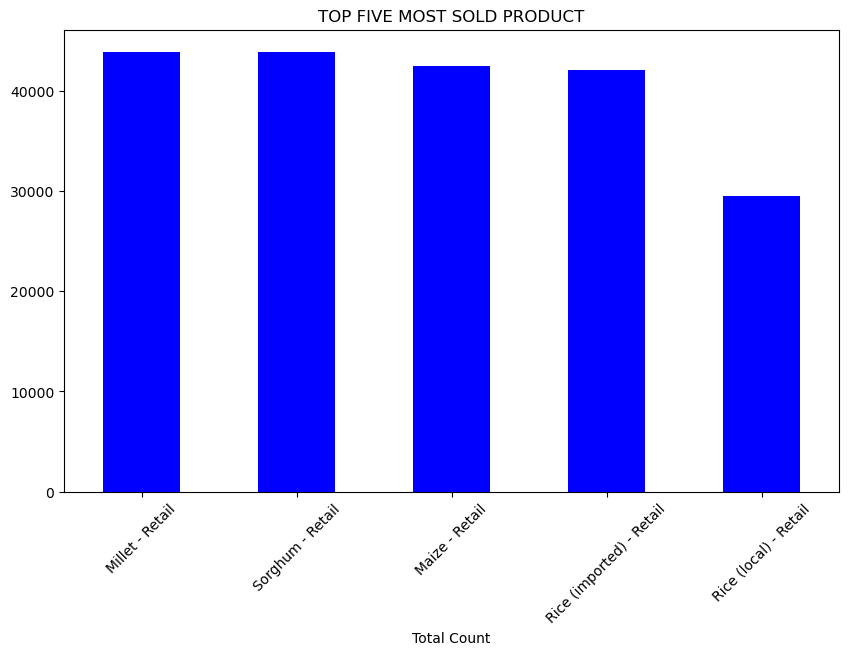

In [31]:
plt.figure(figsize = (10, 6))
TopFiveProducts.plot(kind = 'bar', color = 'b')
plt.title( 'TOP FIVE MOST SOLD PRODUCT')
plt.xlabel('Produce')
plt.xlabel('Total Count')
plt.xticks(rotation = 45)
plt.show()

### 3. Country With The Highest Retail Number

In [32]:
# Read the dataset into a DataFrame
data = pd.read_csv("Desktop/Data Analyst/Python/datasets/africa_food_prices.csv") 
# Group the data by the 'country' column and count the entries
country_counts = data.groupby('country').size()

# Find the country with the highest count
country_with_highest_count = country_counts.idxmax()

print("Country with the highest number of retail entries:", country_with_highest_count)

Country with the highest number of retail entries: Rwanda


### 4. Country With More Than 15 Producers

In [33]:
data = pd.read_csv("Desktop/Data Analyst/Python/datasets/africa_food_prices.csv") 
# Group the data by the 'country' column and count the entries
country_producer_count = data.groupby('country')['produce_id'].nunique()
countries_with_more_than_fiftheen_producers = country_producer_count[country_producer_count > 15]

print(countries_with_more_than_fiftheen_producers)

country
Algeria                     26
Benin                       50
Burundi                     23
Cameroon                    45
Central African Republic    39
Chad                        19
Congo                       18
Egypt                       24
Ethiopia                    92
Gambia                      77
Ghana                       26
Guinea                      26
Guinea-Bissau               53
Kenya                       29
Liberia                     18
Libya                       36
Mali                        48
Mauritania                  26
Mozambique                  41
Nigeria                     42
Rwanda                      65
Sierra Leone                24
Somalia                     17
South Sudan                 47
Zimbabwe                    29
Name: produce_id, dtype: int64


### 5. Wholesales Producing Countries.

In [34]:
# Read the dataset into a DataFrame
data = pd.read_csv("Desktop/Data Analyst/Python/datasets/africa_food_prices.csv") 

# Filter the data for wholesale markets
wholesale_data = data[data['market_type'] == 'Wholesale']

# Get unique wholesale producing countries
wholesale_producing_countries = wholesale_data['country'].unique()

print("Wholesale Producing Countries:")
print(wholesale_producing_countries)

Wholesale Producing Countries:
['Benin' 'Burundi' 'Cameroon' 'Djibouti' 'Ethiopia' 'Ghana' 'Kenya'
 'Mozambique' 'Niger' 'Nigeria' 'Rwanda' 'South Africa' 'South Sudan'
 'Sudan' 'Swaziland' 'Uganda']
